<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>Rohan Tiwari</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Monday, May 16, 2022, 11:59 PM**


* Total marks: 37


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as one Jupyter notebook on Canvas and one PDF file on Gradescope.** The notebook must be already run, that is, make sure that you have run all your code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [ ]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

SVM without PCA

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
%time svm_clf.fit(X_train_red, y_train_red)
print("accuracy over test set is:", svm_clf.score(X_test,y_test))

CPU times: user 18.8 s, sys: 4.77 ms, total: 18.8 s
Wall time: 18.8 s
accuracy over test set is: 0.9594


SVM with PCA

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.60)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

%time svm_clf.fit(X_train_reduced, y_train)
print("accuracy over test set is:", svm_clf.score(X_test_reduced,y_test))

CPU times: user 31.4 s, sys: 139 ms, total: 31.5 s
Wall time: 31.3 s
accuracy over test set is: 0.9723


PCA did not help with training time as it increased in many times e.g. wall time went up more than 50%.
PCA did help increase accuracy over test set slightly. 

## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

RandomForestClassifier without PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
%time rnd_clf.fit(X_train_red, y_train_red)
print("accuracy over test set is:", rnd_clf.score(X_test,y_test))

CPU times: user 9.25 s, sys: 8.16 ms, total: 9.26 s
Wall time: 7.14 s
accuracy over test set is: 0.9504


RandomForestClassifer with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.60)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

%time rnd_clf.fit(X_train_reduced, y_train)
print("accuracy over test set is:", rnd_clf.score(X_test_reduced,y_test))

CPU times: user 58 s, sys: 103 ms, total: 58.1 s
Wall time: 31.3 s
accuracy over test set is: 0.943


Performing PCA does not help with wall times. PCA approach increases wall times.
The accuracy over test set drops sligthly with PCA but the drop is not significant.

# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 10,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: It is helpful to read page 233 of the textbook for information about t-SNE, and see the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

np.random.seed(42)

m = 10000
X = mnist['data'][:m]
y = mnist['target'][:m]

In [ ]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, random_state=42)
start = time.time()
X_reduced = tsne.fit_transform(X)
end = time.time()
print("t-SNE took {:.3f}s.".format(end - start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE took 96.071s.


Scatter Plot

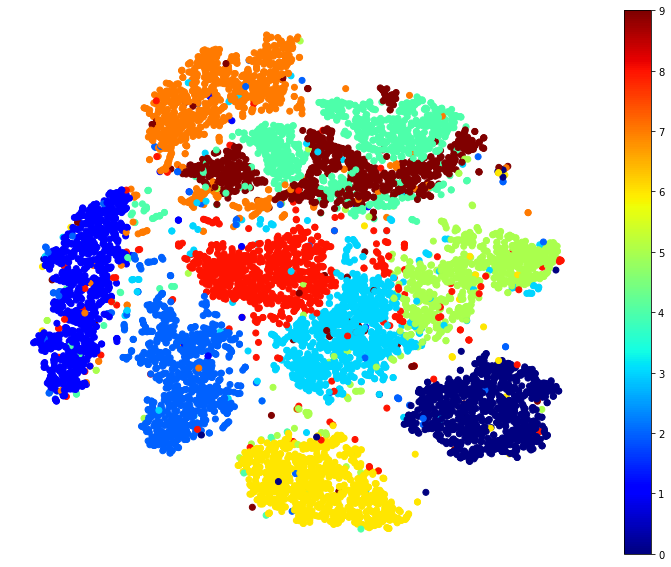

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

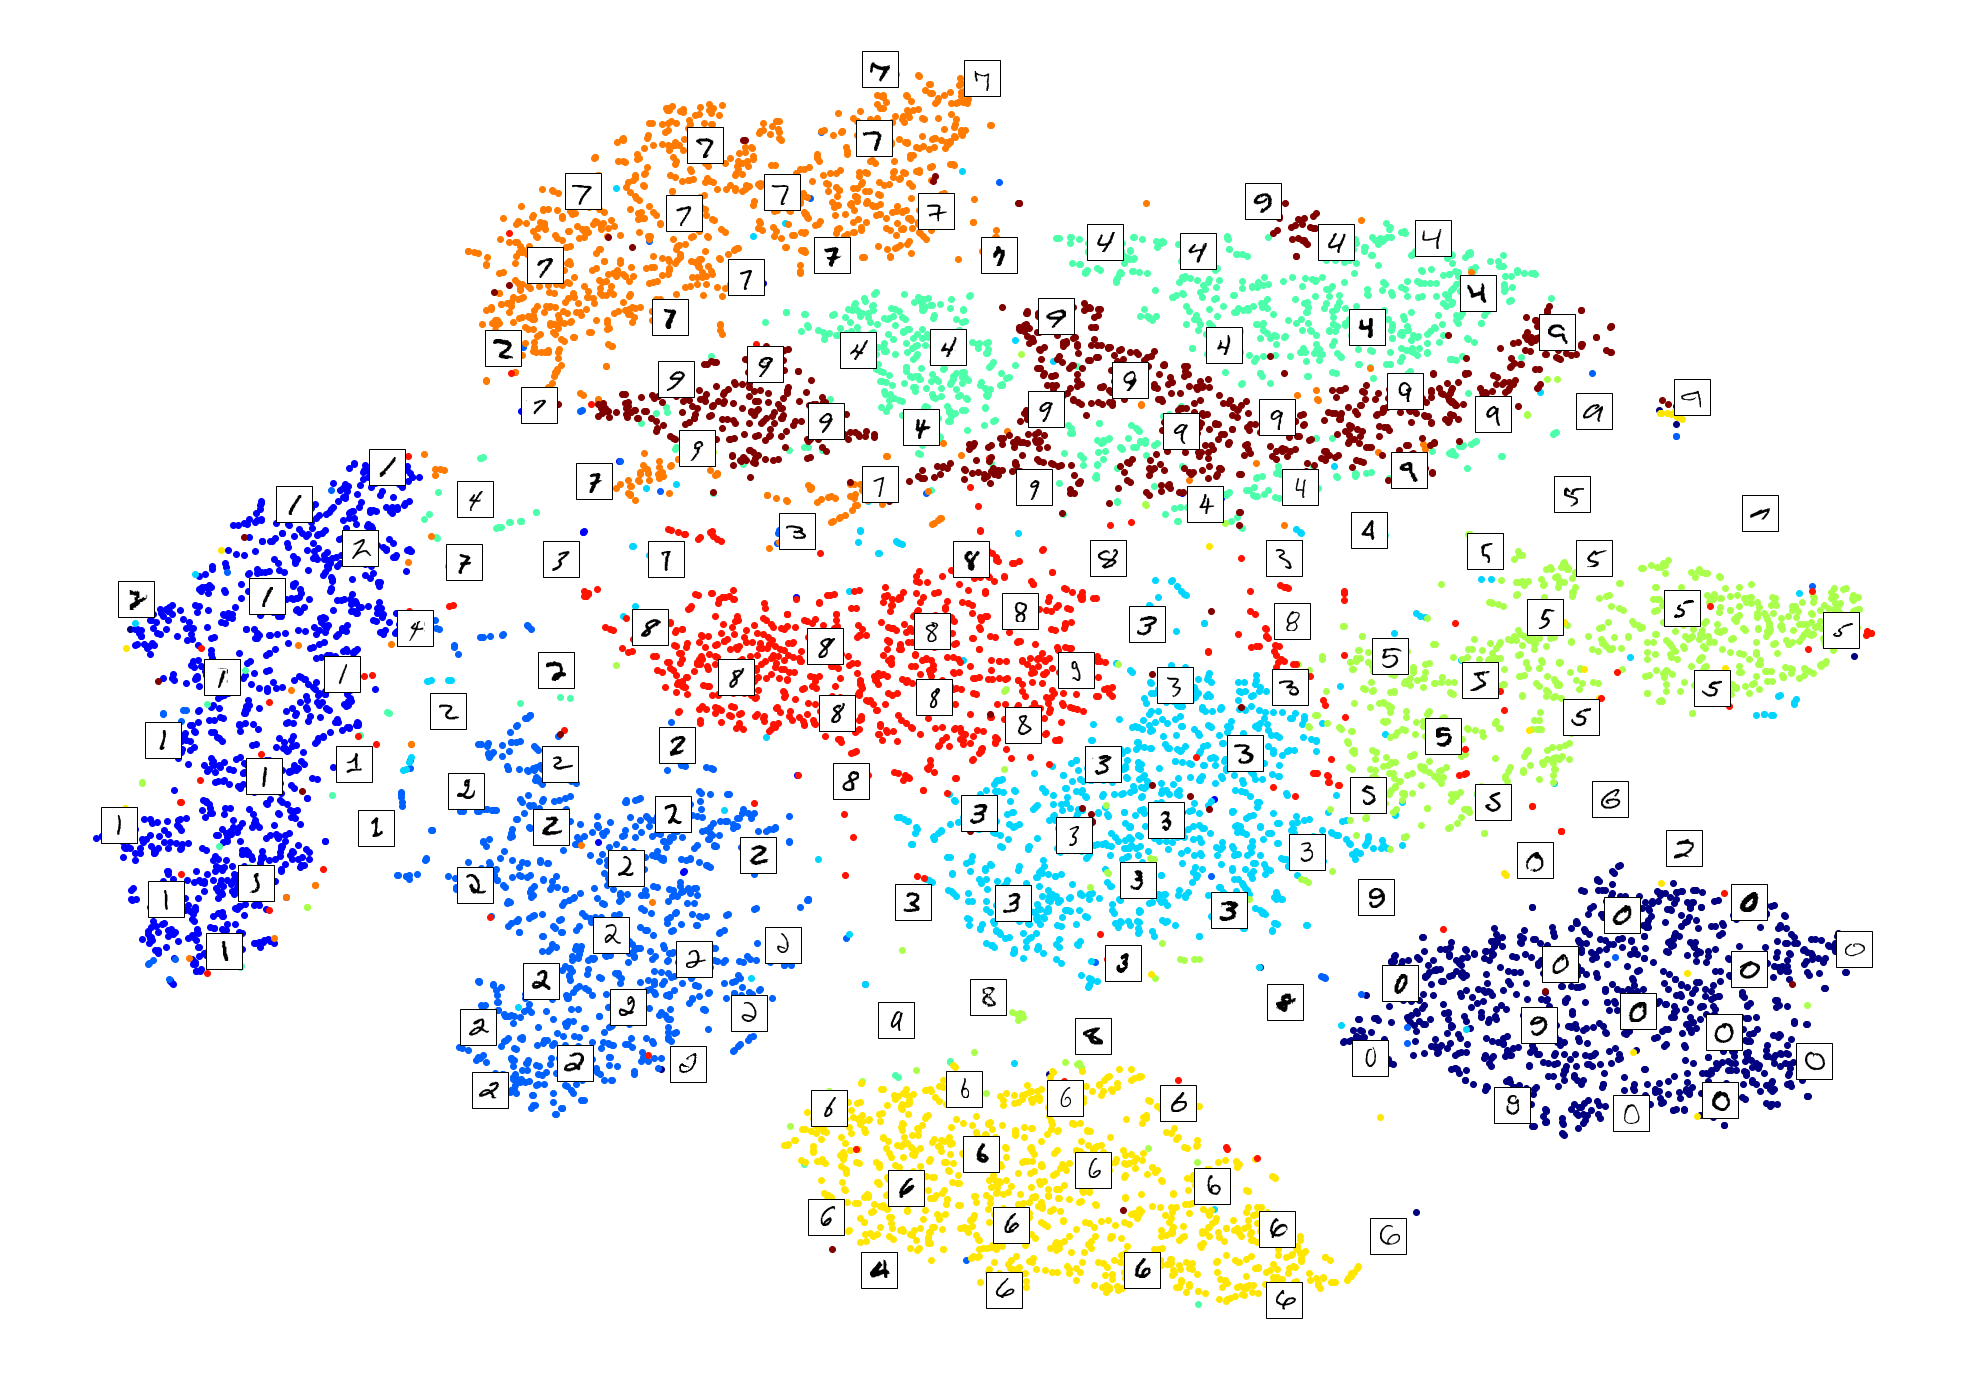

In [ ]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))


This plot tells us which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on). (From textbook github)

## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

PCA took 1.5s.


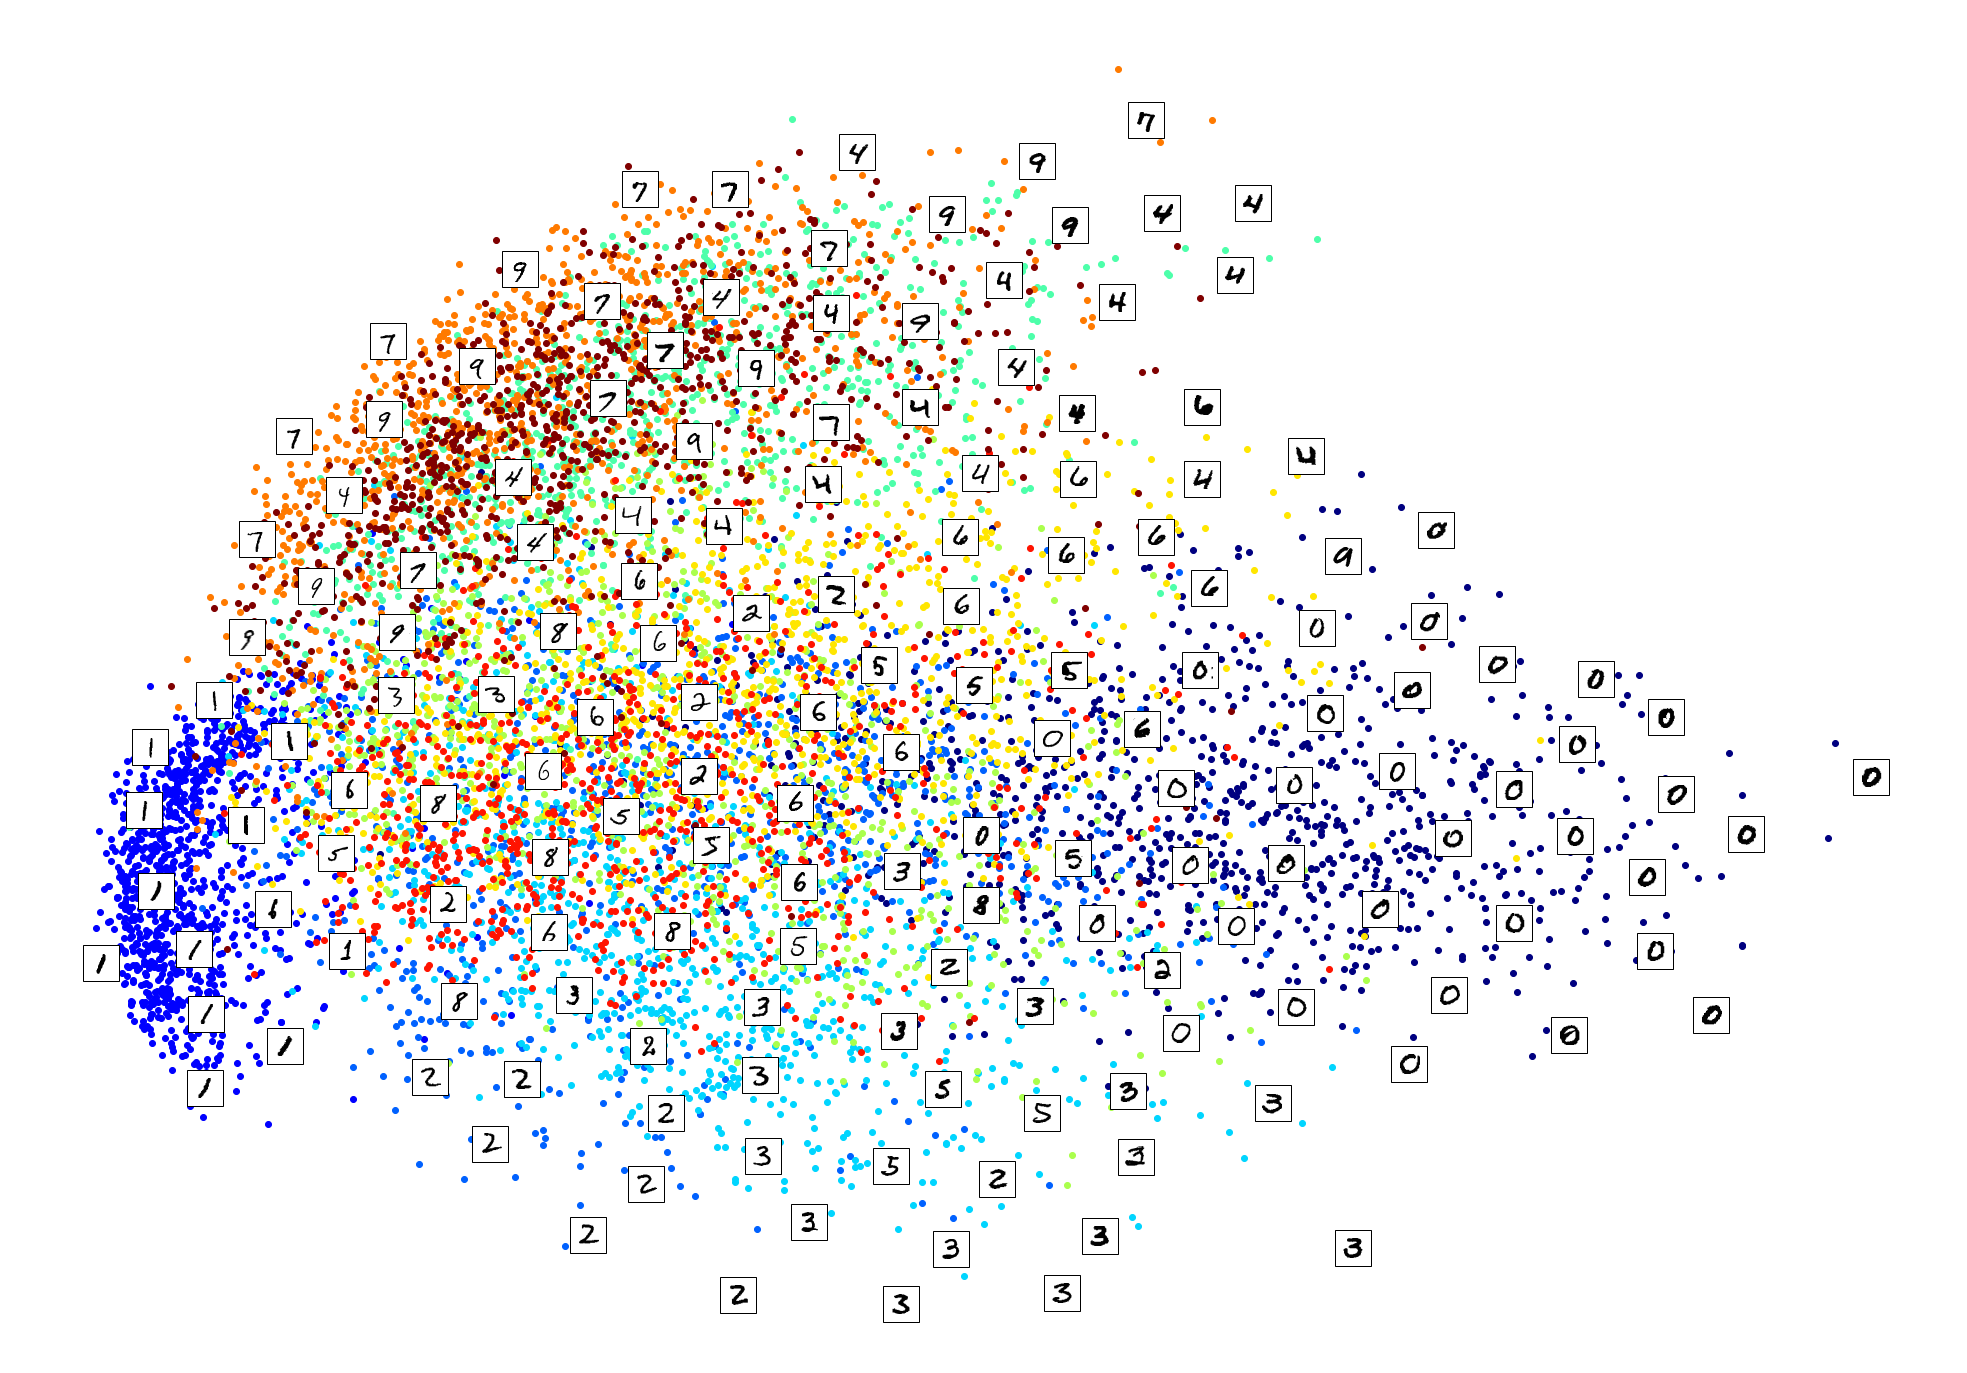

In [ ]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y, images=X, figsize=(35, 25))
plt.show()

Wow, PCA is blazingly fast! But although we do see a few clusters, there's way too much overlap. Let's try LLE:



LLE:

LLE took 37.1s.


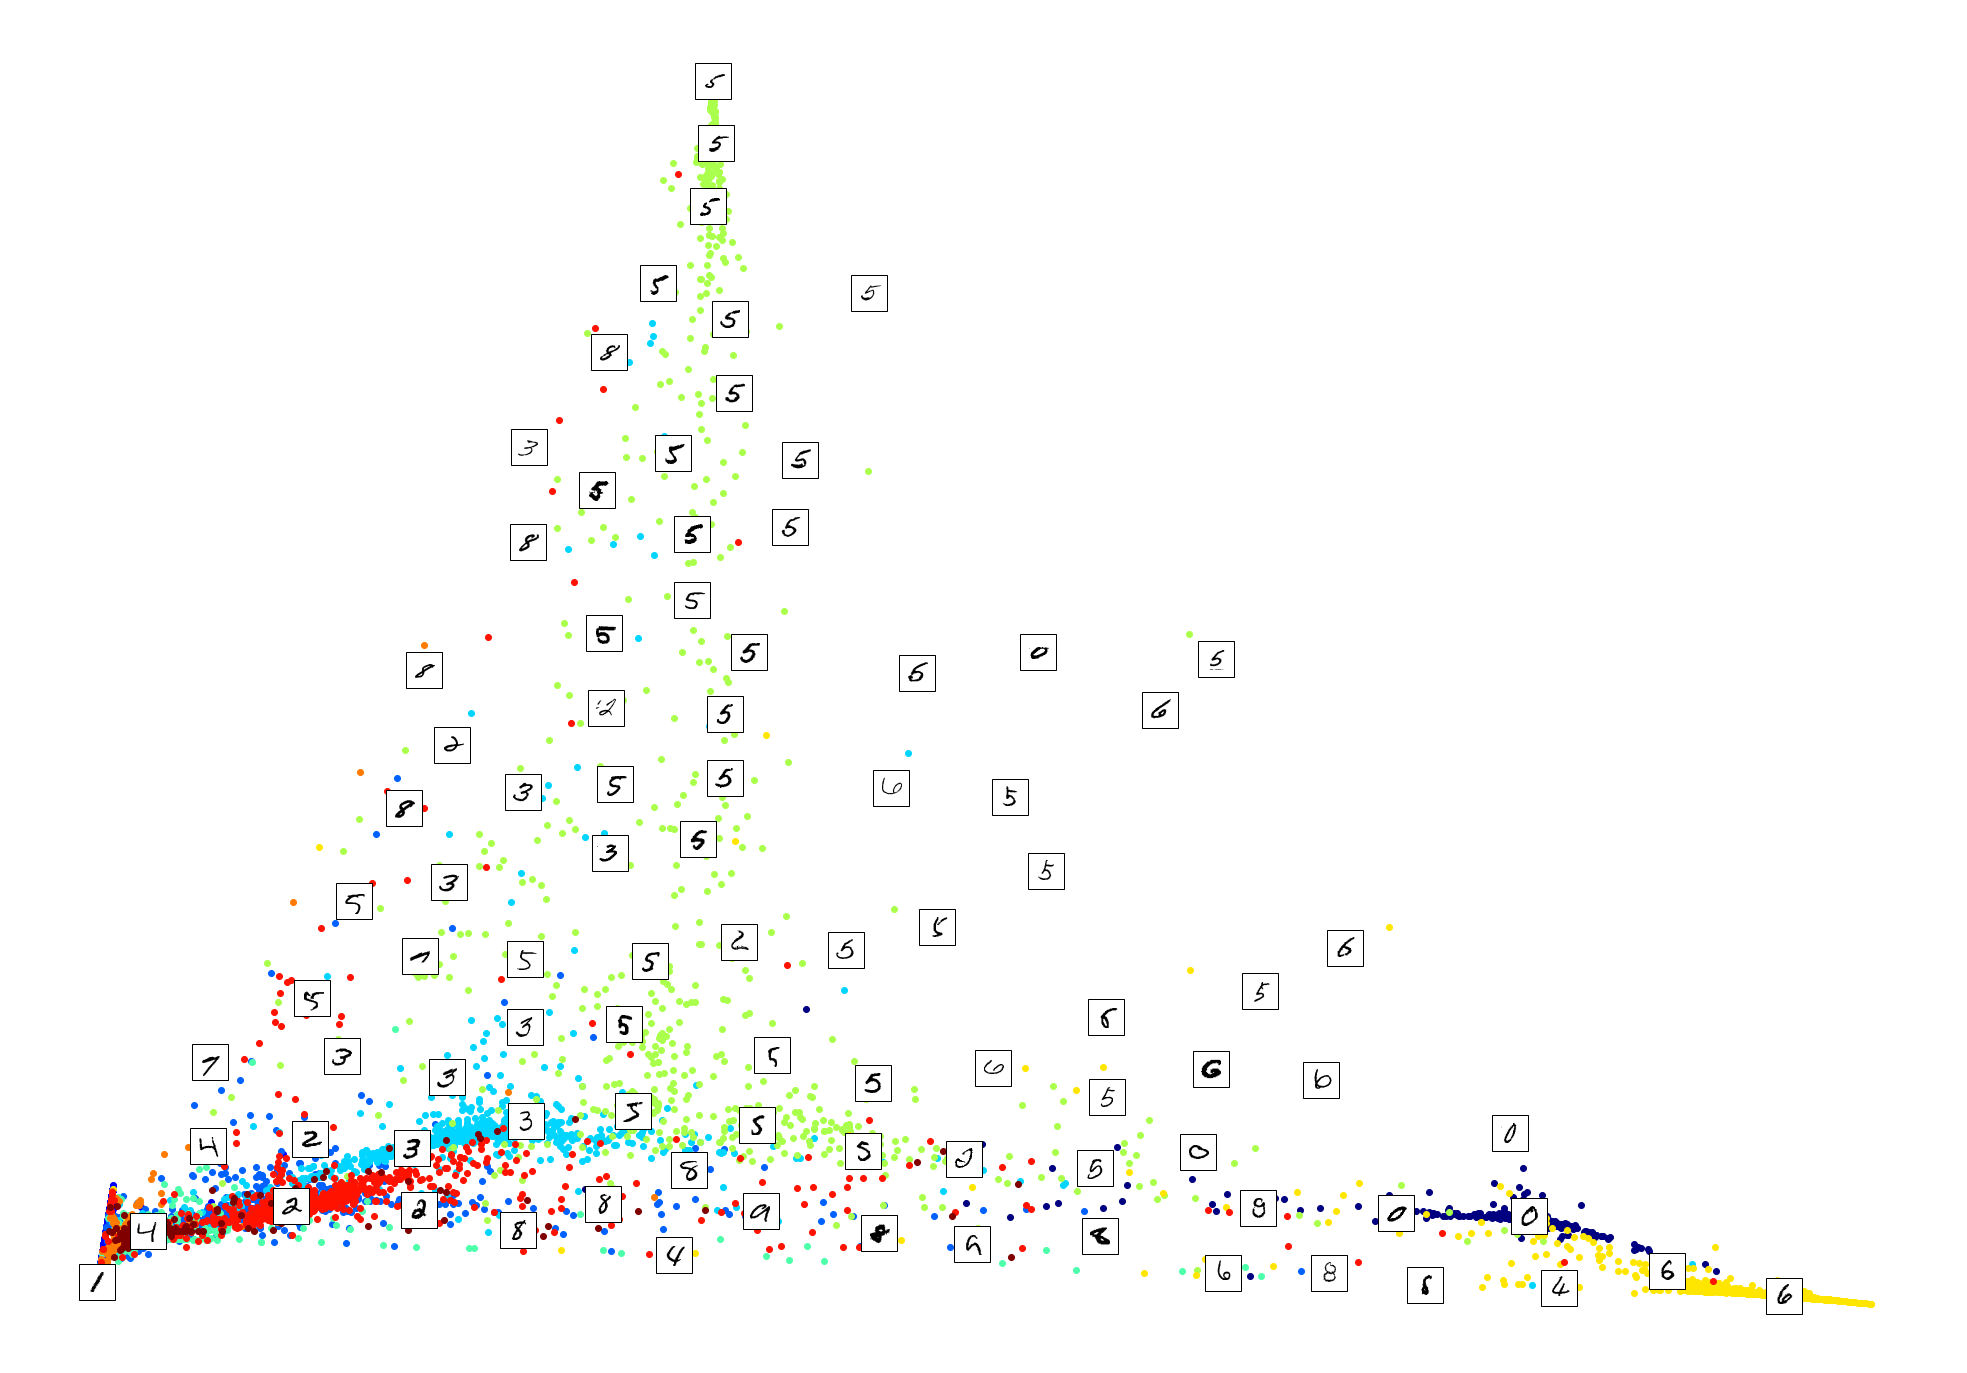

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42,n_jobs=-1).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y, images=X, figsize=(35, 25))
plt.show()

LLE is slower than PCA. Result does not look good.

PCA+t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


PCA+t-SNE took 99.4s.


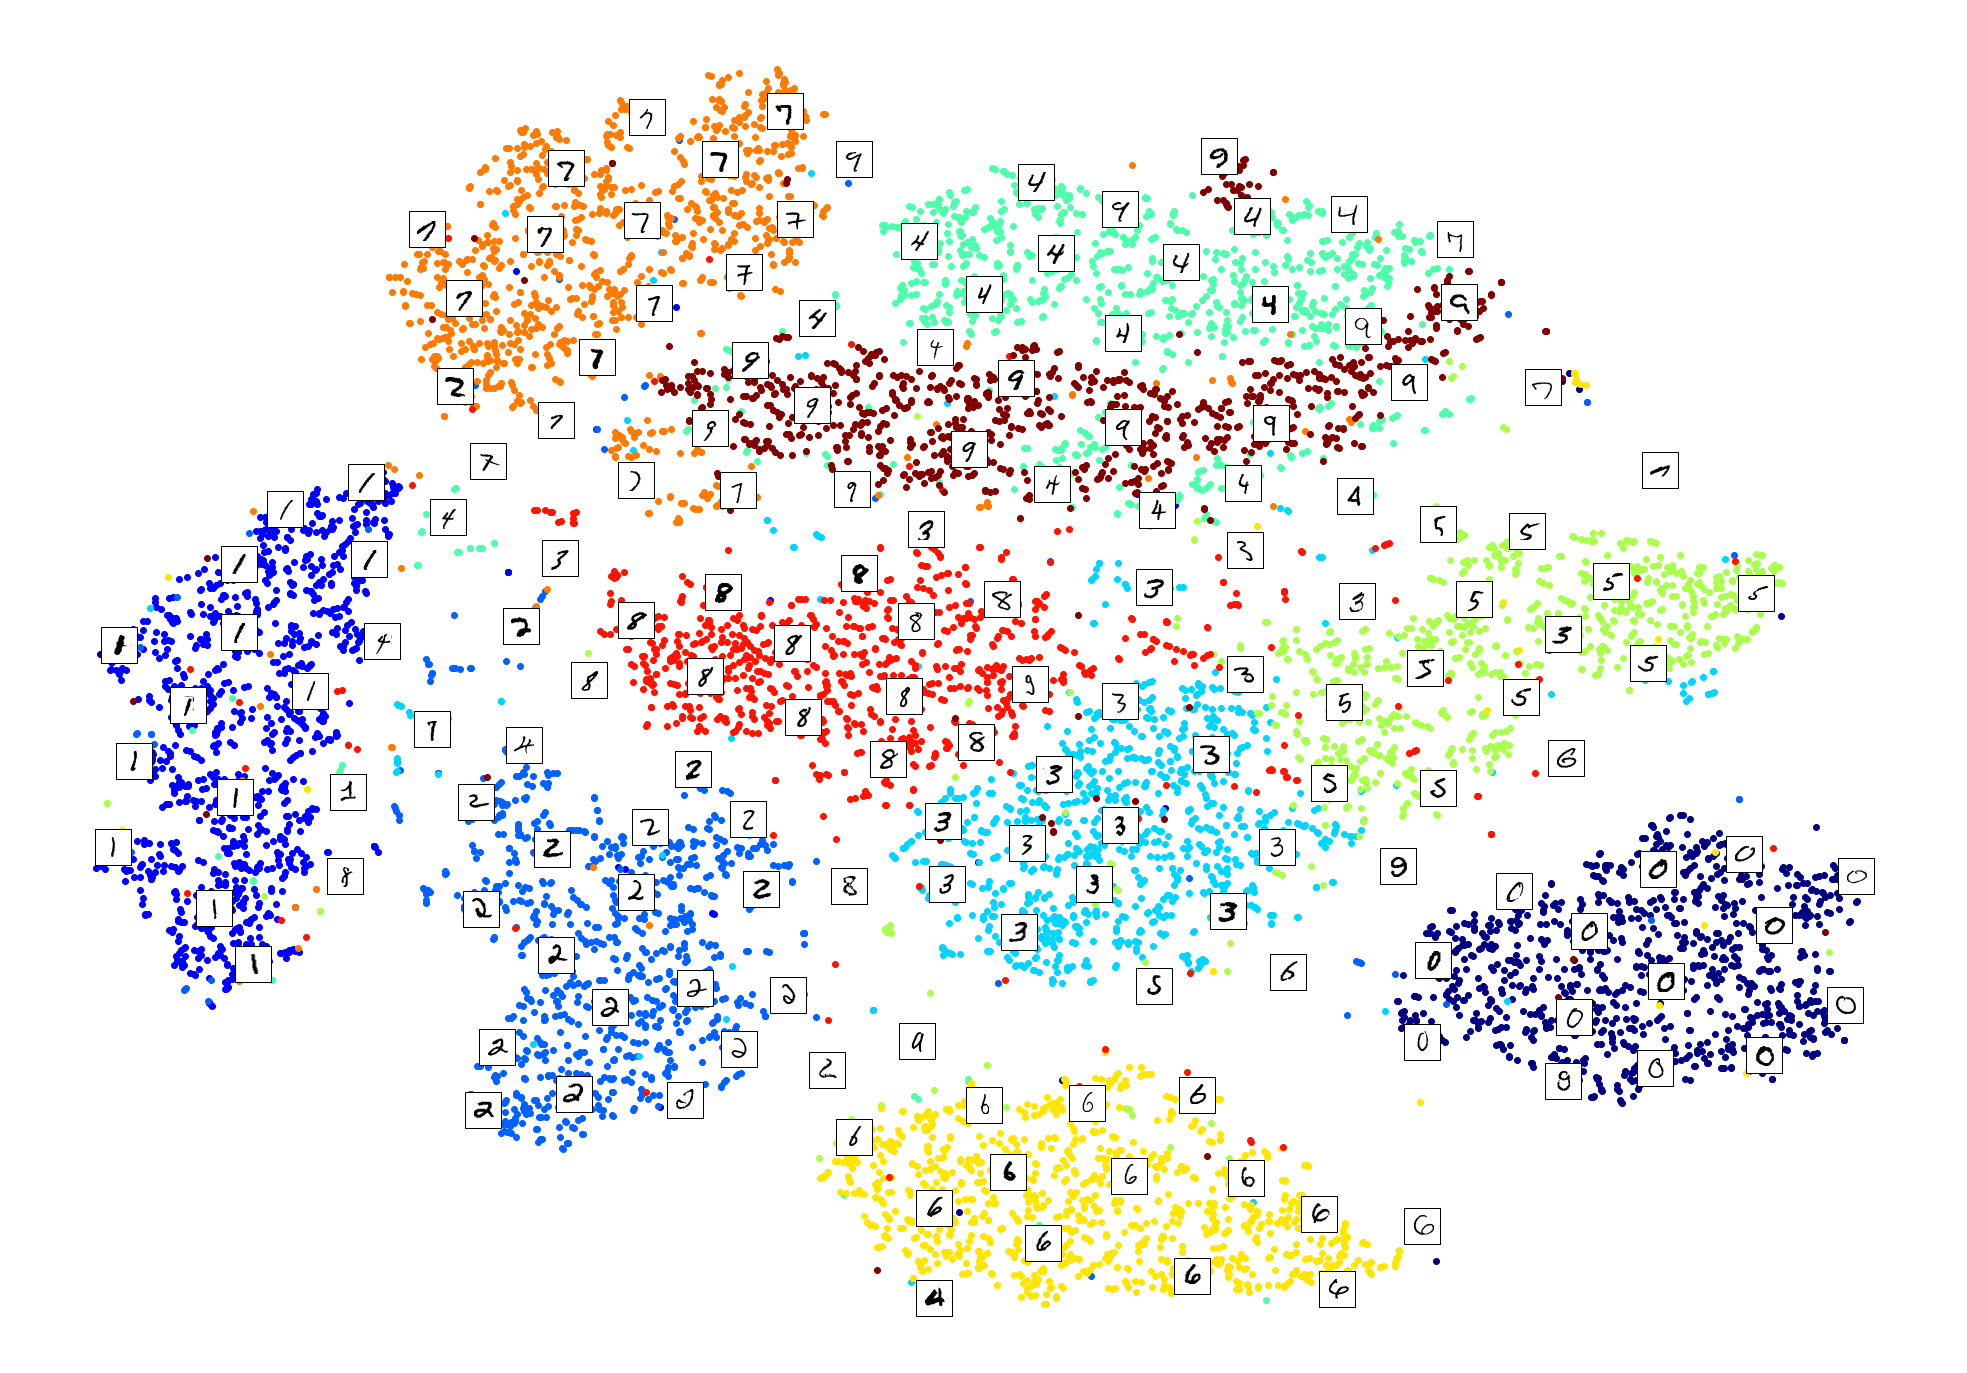

In [ ]:
from sklearn.pipeline import Pipeline
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42))
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y, images=X, figsize=(35, 25))
plt.show()

PCA+t-SNE is slow. Result is not good.

PCA is fastest method.
t-SNE (from part a) has best visualization. 




# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

**[Add your solution here]**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
#X_test_pca = pca.transform(X_test)

pca.n_components_

200

In [ ]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
  #  print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

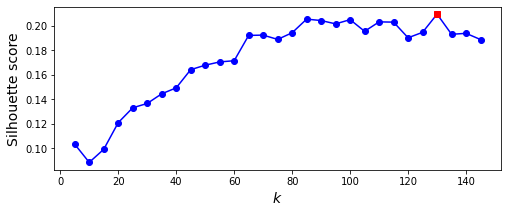

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [ ]:
best_k

130

Best number of clusters is high at 130.

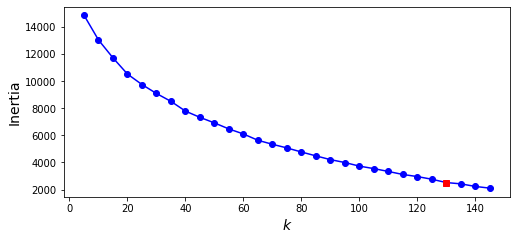

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=130.



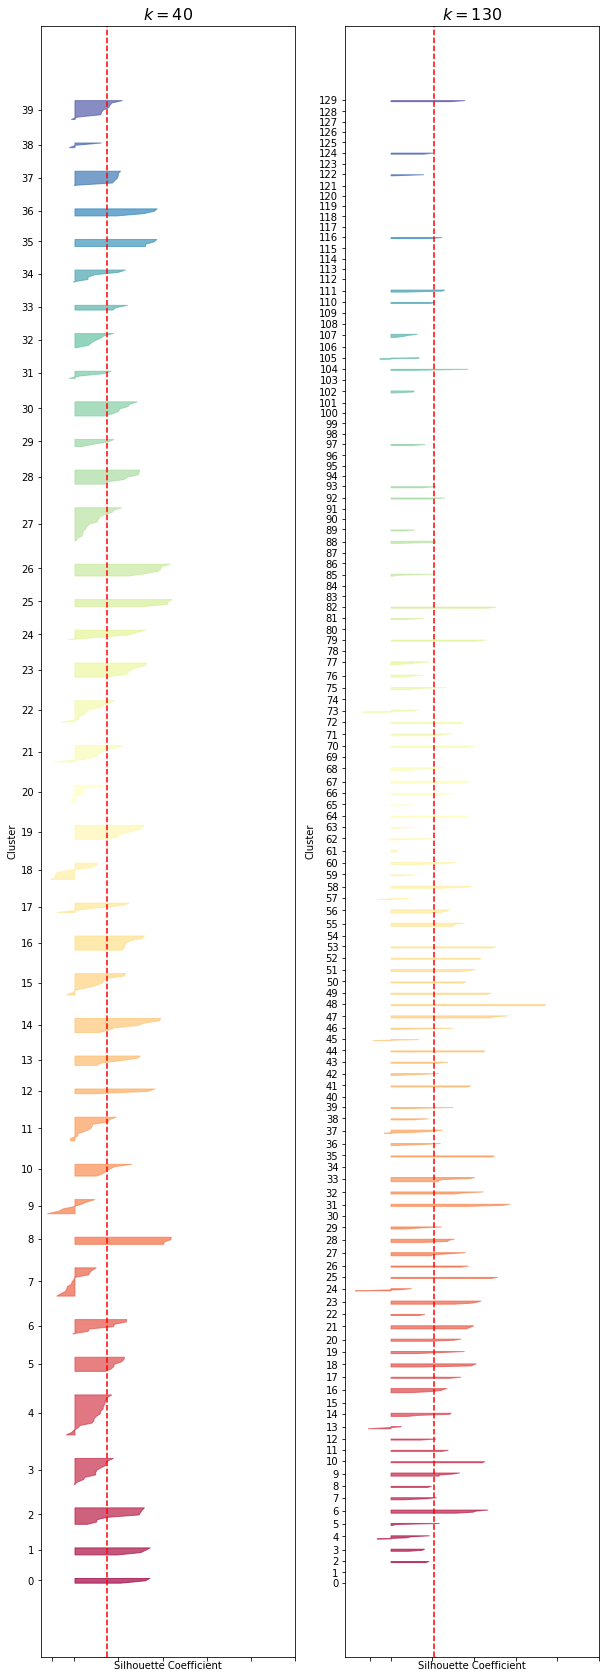

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(10, 30))
m=1
for j, k in enumerate(k_range):
    if k  != best_k and k != 40:
      continue    
    plt.subplot(1, 2, m)
    m = m +1
    y_pred = kmeans_per_k[j].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    # if k in (5, 20,35,50,65,80,95,110,125,140):
    plt.ylabel("Cluster")
    
    # if k in (140,145,150):
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    # else:
    plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[j], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

K=40 seems better as many clusters cross dashed line 

In [ ]:
best_model = kmeans_per_k[best_index]


Cluster 0


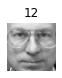

Cluster 1


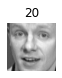

Cluster 2


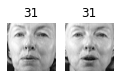

Cluster 3


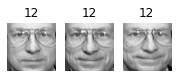

Cluster 4


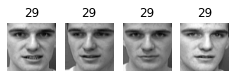

Cluster 5


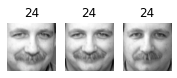

Cluster 6


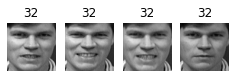

Cluster 7


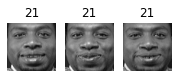

Cluster 8


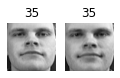

Cluster 9


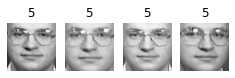

Cluster 10


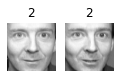

Cluster 11


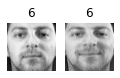

Cluster 12


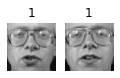

Cluster 13


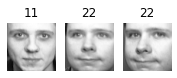

Cluster 14


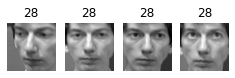

Cluster 15


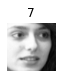

Cluster 16


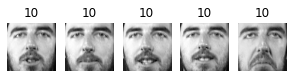

Cluster 17


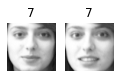

Cluster 18


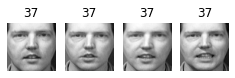

Cluster 19


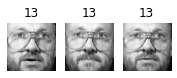

Cluster 20


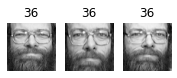

Cluster 21


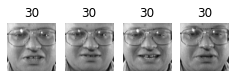

Cluster 22


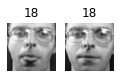

Cluster 23


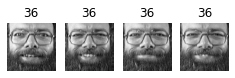

Cluster 24


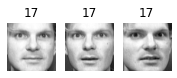

Cluster 25


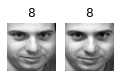

Cluster 26


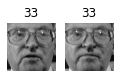

Cluster 27


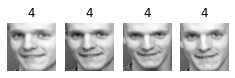

Cluster 28


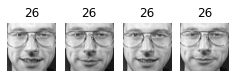

Cluster 29


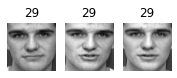

Cluster 30


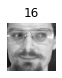

Cluster 31


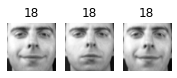

Cluster 32


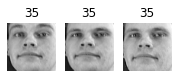

Cluster 33


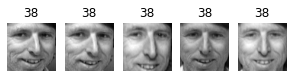

Cluster 34


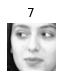

Cluster 35


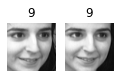

Cluster 36


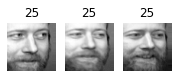

Cluster 37


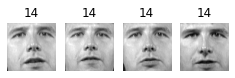

Cluster 38


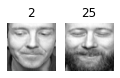

Cluster 39


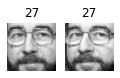

Cluster 40


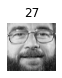

Cluster 41


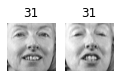

Cluster 42


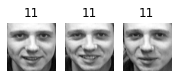

Cluster 43


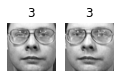

Cluster 44


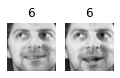

Cluster 45


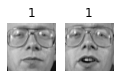

Cluster 46


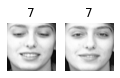

Cluster 47


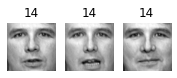

Cluster 48


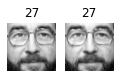

Cluster 49


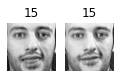

Cluster 50


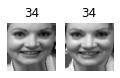

Cluster 51


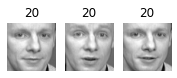

Cluster 52


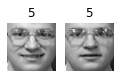

Cluster 53


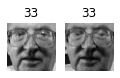

Cluster 54


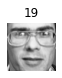

Cluster 55


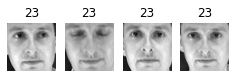

Cluster 56


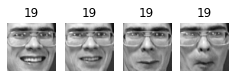

Cluster 57


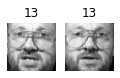

Cluster 58


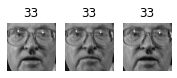

Cluster 59


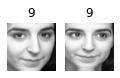

Cluster 60


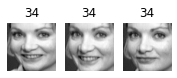

Cluster 61


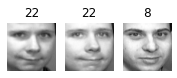

Cluster 62


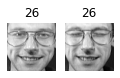

Cluster 63


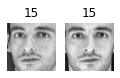

Cluster 64


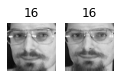

Cluster 65


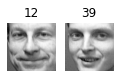

Cluster 66


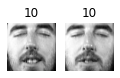

Cluster 67


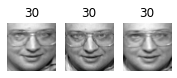

Cluster 68


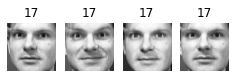

Cluster 69


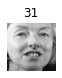

Cluster 70


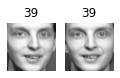

Cluster 71


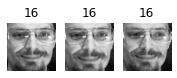

Cluster 72


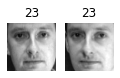

Cluster 73


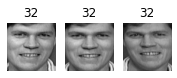

Cluster 74


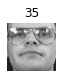

Cluster 75


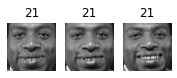

Cluster 76


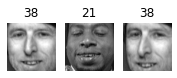

Cluster 77


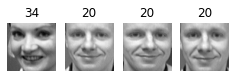

Cluster 78


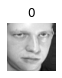

Cluster 79


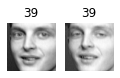

Cluster 80


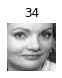

Cluster 81


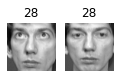

Cluster 82


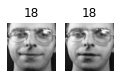

Cluster 83


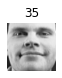

Cluster 84


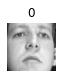

Cluster 85


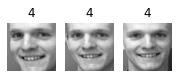

Cluster 86


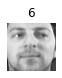

Cluster 87


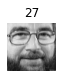

Cluster 88


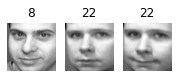

Cluster 89


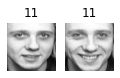

Cluster 90


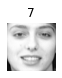

Cluster 91


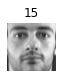

Cluster 92


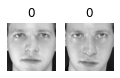

Cluster 93


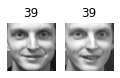

Cluster 94


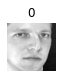

Cluster 95


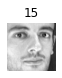

Cluster 96


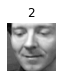

Cluster 97


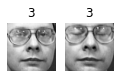

Cluster 98


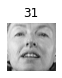

Cluster 99


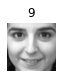

Cluster 100


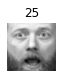

Cluster 101


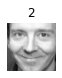

Cluster 102


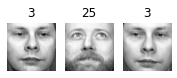

Cluster 103


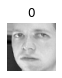

Cluster 104


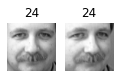

Cluster 105


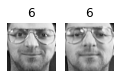

Cluster 106


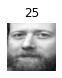

Cluster 107


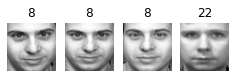

Cluster 108


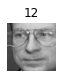

Cluster 109


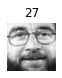

Cluster 110


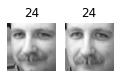

Cluster 111


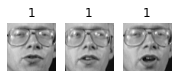

Cluster 112


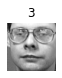

Cluster 113


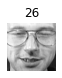

Cluster 114


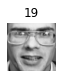

Cluster 115


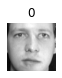

Cluster 116


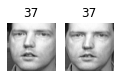

Cluster 117


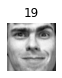

Cluster 118


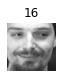

Cluster 119


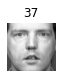

Cluster 120


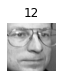

Cluster 121


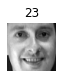

Cluster 122


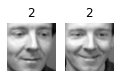

Cluster 123


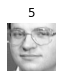

Cluster 124


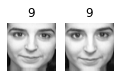

Cluster 125


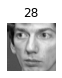

Cluster 126


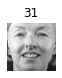

Cluster 127


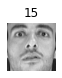

Cluster 128


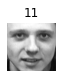

Cluster 129


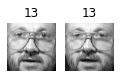

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Not all clusters are useful. Some clusters have either one or 
more intruders, or they have just a single picture.

## (b) Chapter 9, Question 11  [5 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

**[Add your solution here]**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

In [ ]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
#X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.8166666666666667

That's not better at all! Let's see if tuning the number of clusters helps.



In [ ]:
from sklearn.pipeline import Pipeline
score=[]
for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    score.append( pipeline.score(X_valid_pca, y_valid))
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))
x = np.argmax(score)
print(f"The best number of clusters: {k_range[x]} and score: {score[x]}")

5 0.38333333333333336
10 0.5333333333333333
15 0.575
20 0.6583333333333333
25 0.6833333333333333
30 0.725
35 0.6916666666666667
40 0.75
45 0.7416666666666667
50 0.775
55 0.75
60 0.7583333333333333
65 0.8083333333333333
70 0.7583333333333333
75 0.7833333333333333
80 0.7833333333333333
85 0.775
90 0.7916666666666666
95 0.775
100 0.775
105 0.8083333333333333
110 0.825
115 0.8166666666666667
120 0.8083333333333333
125 0.7916666666666666
130 0.8166666666666667
135 0.7916666666666666
140 0.8083333333333333
145 0.825
The best number of clusters: 110 and score: 0.825


Slightly better but not that much.  Looks like the distances to the cluster centroids are not as informative. 

In [ ]:
# X_train_extended = np.c_[X_train_pca, X_train_reduced]
# X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
# #X_test_extended = np.c_[X_test_pca, X_test_reduced]
# clf = RandomForestClassifier(n_estimators=150, random_state=42)
# clf.fit(X_train_extended, y_train)
# clf.score(X_valid_extended, y_valid)

from sklearn.pipeline import Pipeline
score=[]
for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_pca)
    # pipeline = Pipeline([
    #     ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
    #     ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    # ])
    # pipeline.fit(X_train_extended, y_train)
    X_train_reduced = kmeans.transform(X_train_pca)
    X_valid_reduced = kmeans.transform(X_valid_pca)
    X_train_extended = np.c_[X_train_pca, X_train_reduced]
    X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_extended, y_train)
    score.append( clf.score(X_valid_extended, y_valid))
    print(n_clusters, clf.score(X_valid_extended, y_valid))
x = np.argmax(score)
print(f"The best number of clusters: {k_range[x]} and score: {score[x]}")

5 0.9416666666666667
10 0.9166666666666666
15 0.8833333333333333
20 0.875
25 0.9083333333333333
30 0.9083333333333333
35 0.8416666666666667
40 0.9083333333333333
45 0.9083333333333333
50 0.875
55 0.9
60 0.9
65 0.9
70 0.8916666666666667
75 0.8916666666666667
80 0.8833333333333333
85 0.875
90 0.8666666666666667
95 0.8666666666666667
100 0.8583333333333333
105 0.8916666666666667
110 0.8833333333333333
115 0.875
120 0.875
125 0.8583333333333333
130 0.875
135 0.8333333333333334
140 0.85
145 0.8666666666666667
The best number of clusters: 5 and score: 0.9416666666666667


That's the best score we have seen.  Adding features from reduced set to original features  helps. 

# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2021-06-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/91707964/download?download_frd=1).

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2021,6,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2021,6,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

**[Add your solution here]**

In [ ]:
import pandas as pd
import numpy as np
import copy
data_train = copy.deepcopy(data.loc[:'2004-12-31',:])
data_test = copy.deepcopy(data.loc['2005-01-01':,:])
data_train.shape

(684, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

In [ ]:
from sklearn.cluster import KMeans

k_range = range(2, 10, 1) # 2,3,...10
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_train_scaled)
    kmeans_per_k.append(kmeans)

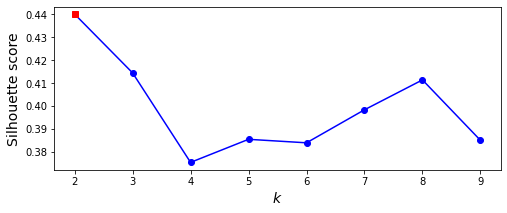

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

silhouette_scores = [silhouette_score(data_train_scaled, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [ ]:
best_k

2

Best score is for k=2 but k=3 and k=8 are also high. 

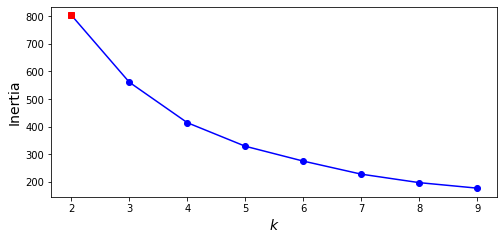

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")

plt.show()

k=2 has lowest inertia

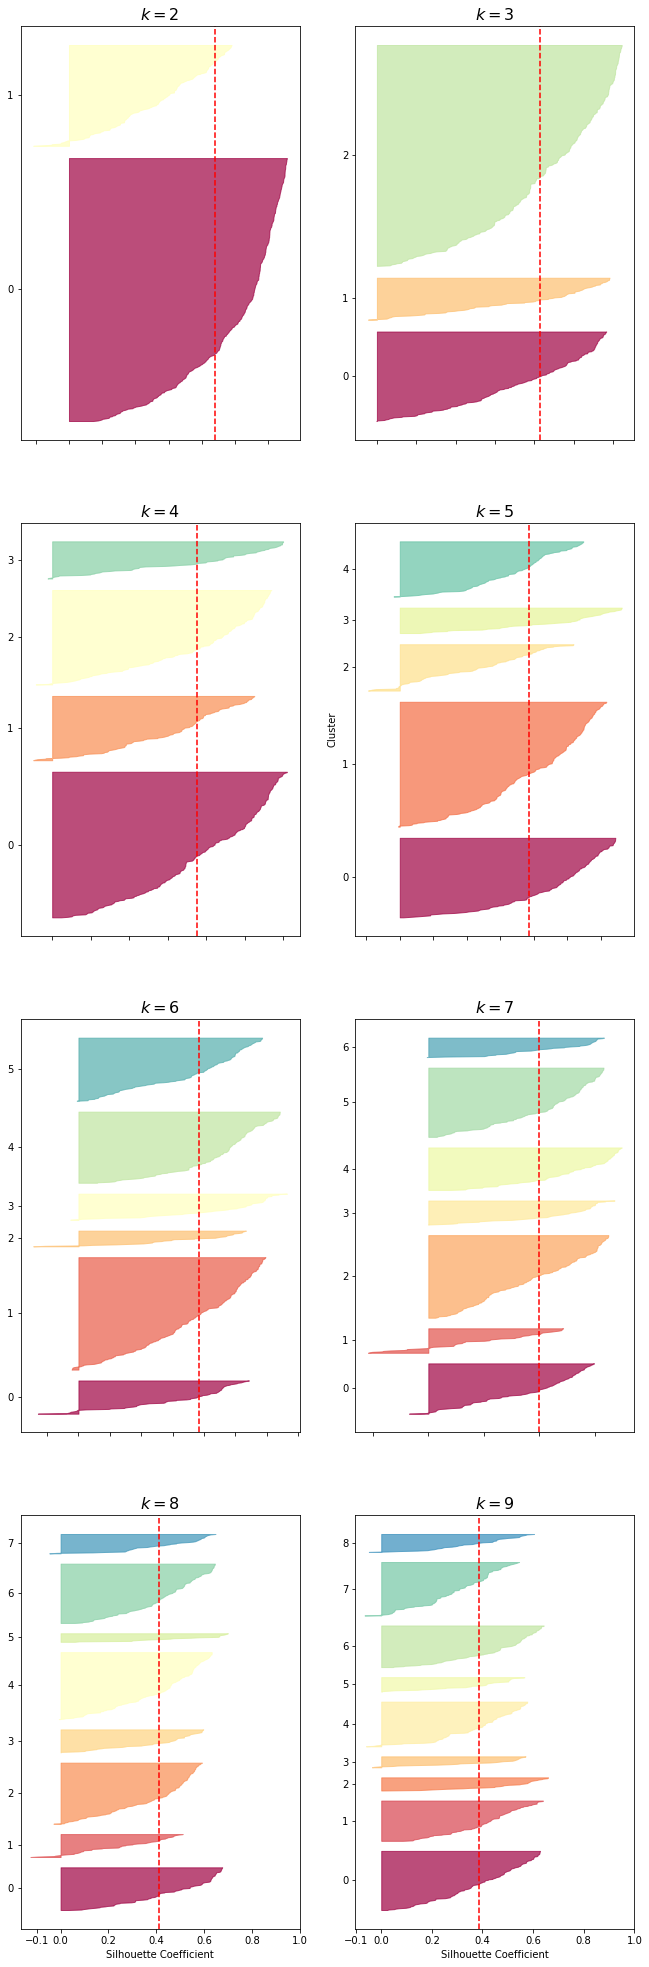

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 35))

for k in k_range:
    plt.subplot(4, 2, k - 1)
    
    y_pred = kmeans_per_k[k-2].labels_
    silhouette_coefficients = silhouette_samples(data_train_scaled, y_pred)

    padding = len(data_train_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 20,35,50,65,80,95,110,125,140):
        plt.ylabel("Cluster")
    
    if k in (8,9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Looking at above diagrams k=2 still looks reasonable, all clusters cross the dotted red line. So we go with k=2. Both clusters are not small. k=2 was also the best with silhoutte score. 

## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. Also plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance.

**[Add your solution here]**

In [ ]:
print(f"for k=2, centroid is :{kmeans_per_k[0].cluster_centers_}")

for k=2, centroid is :[[-0.36765273 -0.42731552]
 [ 0.95589711  1.11102035]]


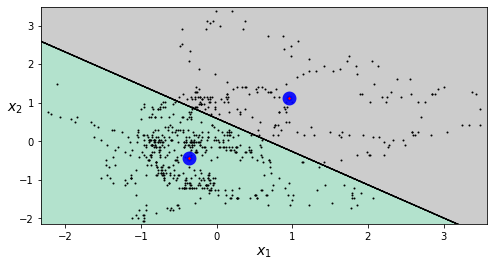

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='b', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_per_k[0], data_train_scaled)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

#do all before standardization
inf = data_train.iloc[:,0]
une = data_train.iloc[:,1]

clusters = kmeans_per_k[0].cluster_centers_
clusters = scaler.inverse_transform(clusters)
regimes = kmeans_per_k[0].predict(data_train_scaled)



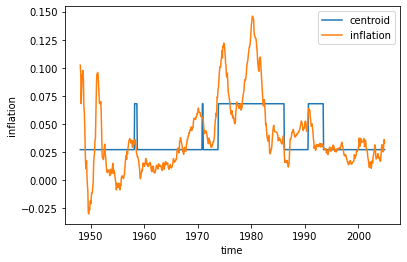

In [ ]:
inf_regimes = inf.copy()
inf_regimes[regimes==0] = clusters[0,0]
inf_regimes[regimes==1] = clusters[1,0]

plt.plot(inf_regimes, label = 'centroid')
plt.plot(inf, label = 'inflation')
plt.legend()
plt.xlabel('time')
plt.ylabel('inflation')
plt.show()

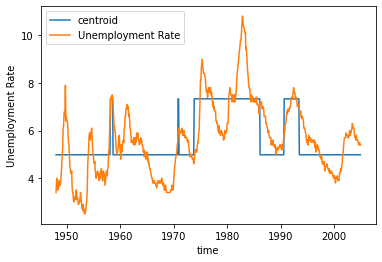

In [ ]:
une_regimes = une.copy()
une_regimes[regimes==0] = clusters[0,1]
une_regimes[regimes==1] = clusters[1,1]

plt.plot(une_regimes, label = 'centroid')
plt.plot(une, label = 'Unemployment Rate')
plt.legend()
plt.xlabel('time')
plt.ylabel('Unemployment Rate')
plt.show()

## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

**[Add your solution here]**

In [ ]:
def markov(lables_df):
  lables_df.loc[:,'left_shift'] = lables_df[0].shift(-1)
  lables_df.loc[:,'count'] = 1
  trans_mat = lables_df.groupby([0,'left_shift']).count().unstack().fillna(0)
  trans_mat = trans_mat.div(trans_mat.sum(axis=1),axis=0).values
  return pd.DataFrame(trans_mat,columns=[0,1])

labels=kmeans_per_k[0].labels_
lables_train_df = pd.DataFrame(labels)
markov(lables_train_df)

,0,1
0,0.991886,0.008114
1,0.021053,0.978947


In [ ]:
labels_test = kmeans_per_k[0].predict(data_test_scaled)
lables_test_df = pd.DataFrame(labels_test)
markov(lables_test_df)

,0,1
0,0.971223,0.028777
1,0.068966,0.931034


# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.